# Loan Prediction - Interest Rate
__Objective:__ To predict interest rate for the loans
<br>
__Data:__ Data for Cleaning & Modeling.csv / Holdout for Testing.csv

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Data for Cleaning & Modeling.csv")
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [3]:
train.shape

(400000, 32)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

### Target Variable
__X1__: interest rate
<br>
Missing values (approx. 15% of data) - drop rows with missing values

In [5]:
# Remove "%" and convert the string to float
train['X1'] = train['X1'].str.replace(r'\D', '').astype(float) / 100

<AxesSubplot:xlabel='X1', ylabel='Density'>

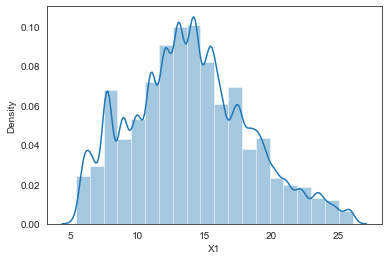

In [6]:
sns.set_style('white')
sns.distplot(train[train['X1'].notnull()]['X1'], bins=20)

In [7]:
train['X1'].describe()

count    338990.000000
mean         13.946271
std           4.377951
min           5.420000
25%          10.990000
50%          13.680000
75%          16.780000
max          26.060000
Name: X1, dtype: float64

In [8]:
# Missing value %
train.X1.isnull().sum() / len(train.X1)

0.152525

In [9]:
# Drop missing values
train = train.dropna(axis=0, subset=['X1'])

---

### Predictor Variables

Based on "Metadata" file, I removed variables that don't affect the interest rate by nature. The following variables were dropped.
- X2 - unique id for the loan
- X3 - unique id assigned for the borrower
- X4 - loan amount requested
- X10 - employer or job title
- X15 - date loan was issued
- X18 - loan title, as provided by borrower (duplicate as X17)
- X19 - first 3 numbers of zip code
- X20 - state of borrower
- X23 - date the borrower's earlierst reported credit line was opened
- X32 - the initial listing status of the loan

The following 3 variables were dropped as the missing values were over 50% of dataset
- X16 - reason for loan provided by borrower
- X25 - number of month since the borrower's last delinquency
- X26 - number of months since the last public record

In [10]:
# Drop irrelevant predictor variables
train = train.drop(['X2', 'X3', 'X4', 'X10', 'X15', 'X16', 'X18', 'X19', 'X20', 'X23', 'X32', 'X16', 'X25', 'X26'], axis=1)
train.head(1)

,X1,X5,X6,X7,X8,X9,X11,X12,X13,X14,X17,X21,X22,X24,X27,X28,X29,X30,X31
0,11.89,"$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,VERIFIED - income,debt_consolidation,19.48,0.0,0.0,10.0,0.0,28854.0,52.10%,42.0


In [11]:
# Convert 3 columns from string to float
train['X5'] = train['X5'].str.replace(r'\D', '').astype(float)
train['X6'] = train['X6'].str.replace(r'\D', '').astype(float)
train['X30'] = train['X30'].str.replace(r'\D', '').astype(float)

### 1. Numerical Variables
- __X5:__ Loan amount funded
- __X6:__ Investor-funded portion of loan
- __X13:__ Annual income of borrower
- __X21:__ Ratio calculated using the borrower's total monthly debt payments
- __X22:__ The number of 30+ days past-due incidences of delinquency
- __X24:__ Number of inquiries by creditors during the past 6 months
- __X27:__ Number of open credit lines in the borrower's credit file
- __X28:__ Number of derogatory public records
- __X29:__ Total credit revolving balance
- __X30:__ Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
- __X31:__ The total number of credit lines currently in the borrower's credit file

In [12]:
numerical = ['X5', 'X6', 'X13', 'X21', 'X22', 'X24', 'X27', 'X28', 'X29', 'X30', 'X31']
categorical = ['X7', 'X8', 'X9', 'X11', 'X12', 'X14', 'X17']
round(train[numerical].describe(), 2)

,X5,X6,X13,X21,X22,X24,X27,X28,X29,X30,X31
count,338989.00,338989.00,287238.00,338989.00,338989.00,338989.00,338989.00,338989.00,338989.00,338765.00,338989.00
mean,14248.31,14182.00,73151.46,17.00,0.27,0.82,11.12,0.15,15974.34,4998.88,24.98
std,8238.06,8255.14,56189.67,7.70,0.78,1.06,4.90,0.51,19765.17,2859.76,11.47
min,500.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,8000.00,8000.00,45000.00,11.25,0.00,0.00,8.00,0.00,6462.00,3010.00,17.00
50%,12000.00,12000.00,63000.00,16.70,0.00,0.00,10.00,0.00,11782.00,5360.00,23.00
75%,20000.00,19900.00,88078.75,22.50,0.00,1.00,14.00,0.00,20233.00,7260.00,32.00
max,35000.00,35000.00,7500000.00,39.99,29.00,8.00,76.00,63.00,2568995.00,89230.00,118.00


<AxesSubplot:>

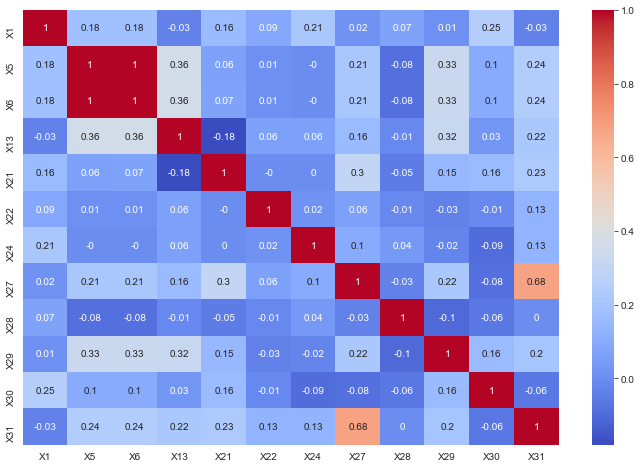

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(round(train.corr(), 2), cmap='coolwarm', annot=True)

__Observation__
<br>
None of the numerical variables are highly correlated to the targe variable -> perform feature engineering
<br>

Highly correlated variables:
- X5 and X6 - drop one of the variables
- X27 and X31 - drop one of the variables

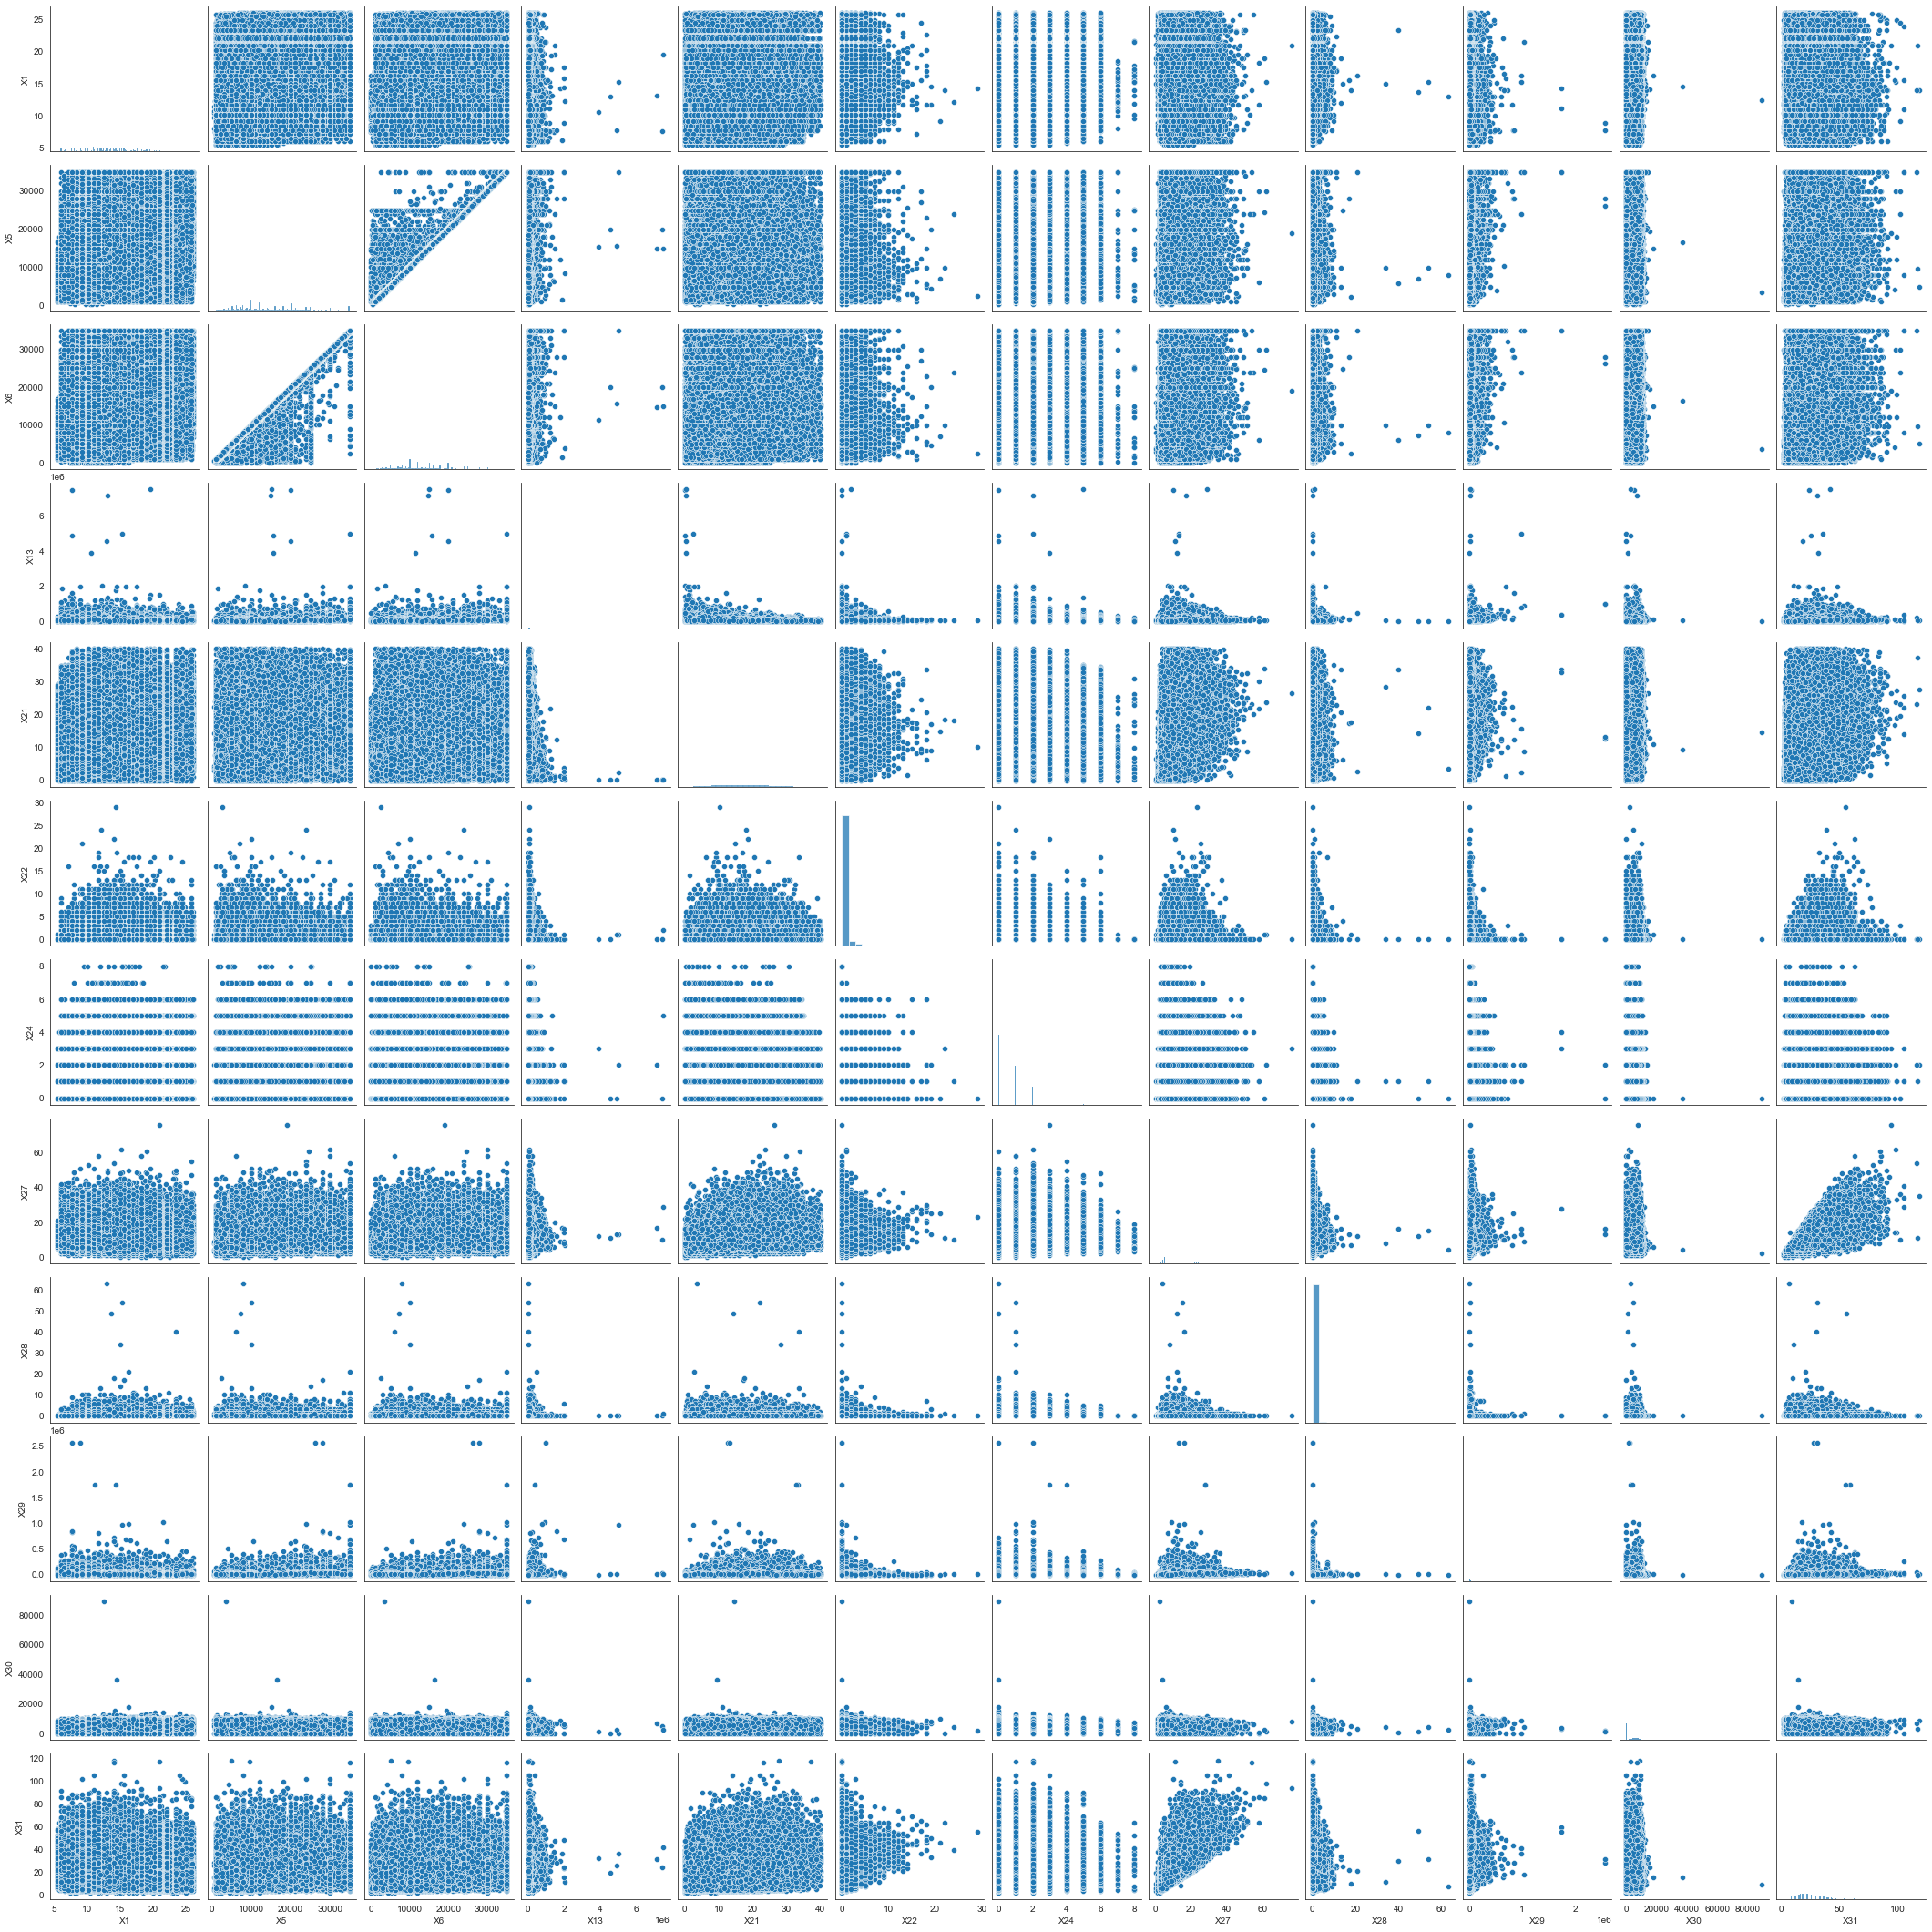

In [14]:
# Create a pairplot to check relationship between numerical variables and with target
sns.pairplot(train.drop(categorical, axis=1))

__1.1 X5 & X6__

<AxesSubplot:xlabel='X5', ylabel='Density'>

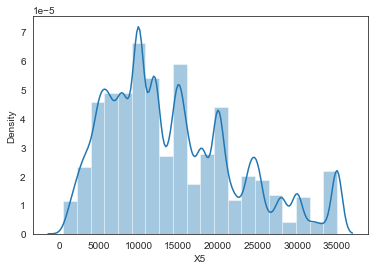

In [15]:
sns.distplot(train['X5'], bins=20)

In [16]:
# Create a new feature to check if the ratio of investor funded portion correlates with target
train['X6_1'] = train['X6'] / train['X5']

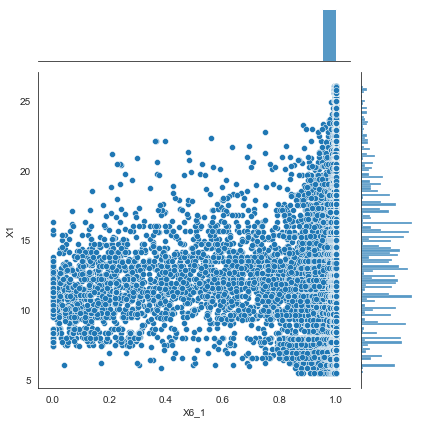

In [17]:
sns.jointplot(x='X6_1', y='X1', data=train, kind='scatter')

__1.2 X22__

In [18]:
train['X22'].value_counts().sort_index()

0.0     280249
1.0      39796
2.0      11494
3.0       3964
4.0       1658
5.0        841
6.0        441
7.0        226
8.0        111
9.0         68
10.0        48
11.0        27
12.0        23
13.0        13
14.0         6
15.0         4
16.0         5
17.0         3
18.0         6
19.0         2
21.0         1
22.0         1
24.0         1
29.0         1
Name: X22, dtype: int64

In [19]:
train['Past_due_over_30_days'] = train['X22'].apply(lambda x: 1 if x != 0 else 0)

Text(20.0, 0.5, 'Interest rate')

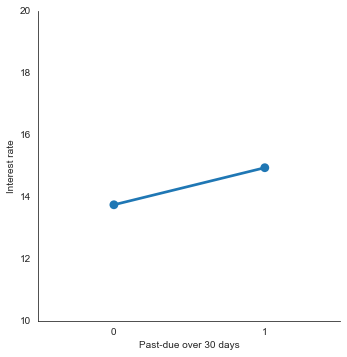

In [20]:
g_22 = sns.PairGrid(x_vars='Past_due_over_30_days', y_vars='X1', data=train, height=5)
g_22.map(sns.pointplot)
g_22.set(ylim=(10, 20))
plt.xlabel('Past-due over 30 days')
plt.ylabel('Interest rate')

In [21]:
train = train.drop('X22', axis=1)

__1.3 X24__

In [22]:
train['X24'].value_counts()

0.0    172066
1.0     95408
2.0     43969
3.0     19780
4.0      5134
5.0      1831
6.0       739
7.0        44
8.0        18
Name: X24, dtype: int64

Text(42.5, 0.5, 'Interest rate')

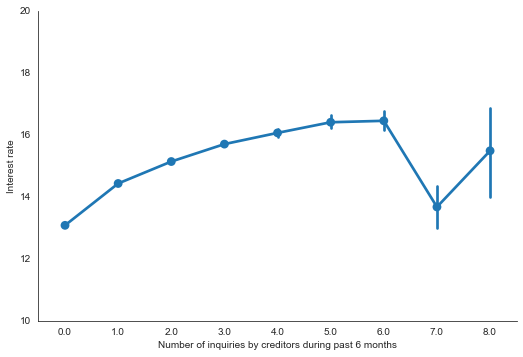

In [23]:
g_24 = sns.PairGrid(x_vars='X24', y_vars='X1', data=train, height=5, aspect=1.5)
g_24.map(sns.pointplot)
g_24.set(ylim=(10, 20))
plt.xlabel('Number of inquiries by creditors during past 6 months')
plt.ylabel('Interest rate')

In [24]:
train['Inquiries'] = train['X24'].apply(lambda x: 1 if x != 0 else 0)

Text(20.0, 0.5, 'Interest rate')

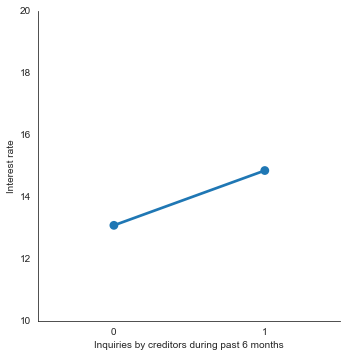

In [25]:
g_24 = sns.PairGrid(x_vars='Inquiries', y_vars='X1', data=train, height=5)
g_24.map(sns.pointplot)
g_24.set(ylim=(10, 20))
plt.xlabel('Inquiries by creditors during past 6 months')
plt.ylabel('Interest rate')

In [26]:
train = train.drop('X24', axis=1)

### 2. Categorical Variables
- X7: Number of payments (36 or 60 months)
- X8: Loan grade
- X9: Loan subgrade
- X11: Number of years employed
- X12: Home ownership status
- X14: Income verified, not verified
- X17: Loan category

In [27]:
round(train[categorical].describe(include='all'), 2)

,X7,X8,X9,X11,X12,X14,X17
count,338989,287123,287123,324195,287030,338989,338989
unique,2,7,35,11,6,3,14
top,36 months,B,B3,10+ years,MORTGAGE,VERIFIED - income,debt_consolidation
freq,247791,86121,20352,108491,145958,127040,198226


__2.1 X7__

In [28]:
train['X7'] = train['X7'].str.strip()
train['X7'].unique()

array(['36 months', '60 months', nan], dtype=object)

In [29]:
train['X7'].value_counts()

36 months    247791
60 months     91198
Name: X7, dtype: int64

Text(20.0, 0.5, 'Interest rate')

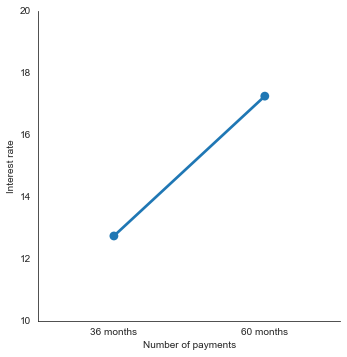

In [30]:
g_7 = sns.PairGrid(x_vars='X7', y_vars='X1', data=train, height=5)
g_7.map(sns.pointplot)
g_7.set(ylim=(10, 20))
plt.xlabel('Number of payments')
plt.ylabel('Interest rate')

In [31]:
train['X7'].fillna('36 months', inplace=True)

__2.2 X8__

In [32]:
train['X8'].value_counts().sort_index()

A    45525
B    86121
C    76446
D    46984
E    21628
F     8395
G     2024
Name: X8, dtype: int64

Text(20.0, 0.5, 'Interest rate')

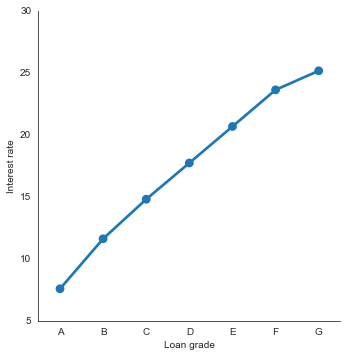

In [33]:
g_8 = sns.PairGrid(x_vars='X8', y_vars='X1', data=train, height=5)
g_8.map(func=sns.pointplot, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
g_8.set(ylim=(5, 30))
plt.xlabel('Loan grade')
plt.ylabel('Interest rate')

__2.3 X9__

Text(65.0, 0.5, 'Interest rate')

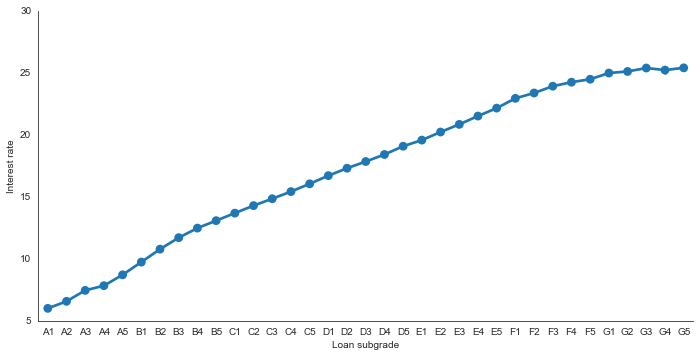

In [34]:
g_9 = sns.PairGrid(x_vars='X9', y_vars='X1', data=train.sort_values(by='X9'), height=5, aspect=2)
g_9.map(sns.pointplot)
g_9.set(ylim=(5, 30))
plt.xlabel('Loan subgrade')
plt.ylabel('Interest rate')

__2.4 X11__

In [35]:
train['X11'].value_counts().sort_index()

1 year        21432
10+ years    108491
2 years       30117
3 years       26670
4 years       20259
5 years       23072
6 years       19601
7 years       19445
8 years       16212
9 years       12893
< 1 year      26003
Name: X11, dtype: int64

Text(65.0, 0.5, 'Interest rate')

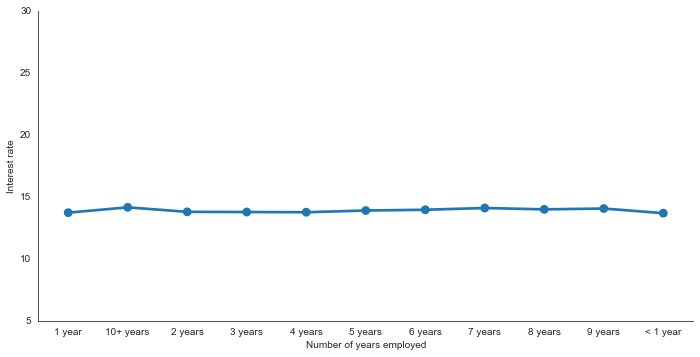

In [36]:
g_11 = sns.PairGrid(x_vars='X11', y_vars='X1', data=train.sort_values(by='X11'), height=5, aspect=2)
g_11.map(sns.pointplot)
g_11.set(ylim=(5, 30))
plt.xlabel('Number of years employed')
plt.ylabel('Interest rate')

__2.5 X12__

In [37]:
train['X12'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

Text(42.5, 0.5, 'Interest rate')

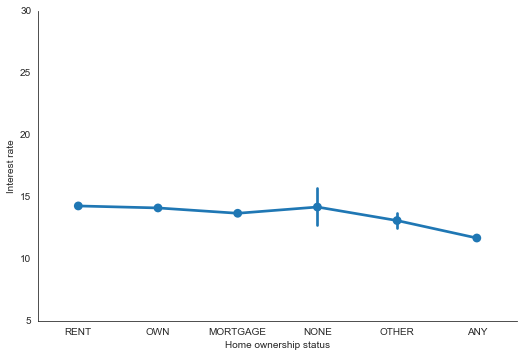

In [38]:
g_12 = sns.PairGrid(x_vars='X12', y_vars='X1', data=train, height=5, aspect=1.5)
g_12.map(sns.pointplot)
g_12.set(ylim=(5, 30))
plt.xlabel('Home ownership status')
plt.ylabel('Interest rate')

__2.6 X14__

In [39]:
train['X14'].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: X14, dtype: int64

In [40]:
train['X14'] = train['X14'].apply(lambda x: 0 if x == 'not verified' else 1)

Text(20.0, 0.5, 'Interest rate')

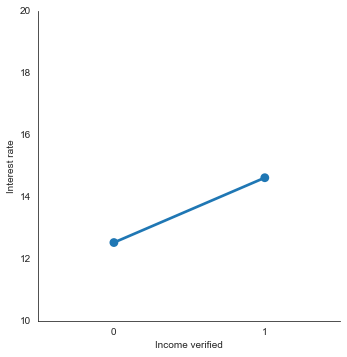

In [41]:
g_14 = sns.PairGrid(x_vars='X14', y_vars='X1', data=train, height=5)
g_14.map(sns.pointplot)
g_14.set(ylim=(10, 20))
plt.xlabel('Income verified')
plt.ylabel('Interest rate')

__2.7 X17__

In [42]:
train['X17'].value_counts()

debt_consolidation    198226
credit_card            75680
home_improvement       19625
other                  17154
major_purchase          7312
small_business          5359
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              279
renewable_energy         267
Name: X17, dtype: int64

Text(110.0, 0.5, 'Interest rate')

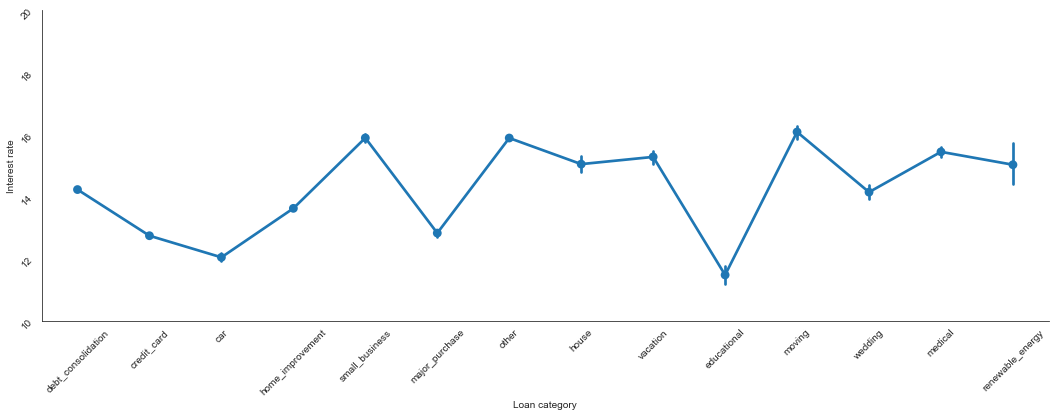

In [43]:
g_17 = sns.PairGrid(x_vars='X17', y_vars='X1', data=train, height=5, aspect=3)
g_17.map(sns.pointplot)
g_17.set(ylim=(10, 20))
for ax in g_17.axes.flatten():
    ax.tick_params(rotation = 45)

plt.xlabel('Loan category')
plt.ylabel('Interest rate')

In [44]:
train.groupby('X17')['X1'].mean().sort_values()

X17
educational           11.476344
car                   12.044260
credit_card           12.740792
major_purchase        12.826208
home_improvement      13.623039
wedding               14.144917
debt_consolidation    14.228413
renewable_energy      15.028652
house                 15.048247
vacation              15.280622
medical               15.444302
other                 15.889428
small_business        15.892461
moving                16.084233
Name: X1, dtype: float64

In [45]:
train['X17'].fillna('debt_consolidation', inplace=True)

In [46]:
train.head(1)

,X1,X5,X6,X7,X8,X9,X11,X12,X13,X14,X17,X21,X27,X28,X29,X30,X31,X6_1,Past_due_over_30_days,Inquiries
0,11.89,25000.0,19080.0,36 months,B,B4,< 1 year,RENT,85000.0,1,debt_consolidation,19.48,10.0,0.0,28854.0,5210.0,42.0,0.7632,0,0


Based on EDA, the following variables were dropped
- X5, X6, X9, X11, X12, X13, X21, X27, X28, X29, X30, X31, X6_1

In [47]:
train['X7'] = train['X7'].apply(lambda x: 1 if x == '36 months' else 0)

loan_grade_label = {'A1':0, 'A2':1, 'A3':2, 'A4':3, 'A5':4,
                    'B1':5, 'B2':6, 'B3':7, 'B4':8, 'B5':9, 
                    'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14, 
                    'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19, 
                    'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24, 
                    'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29, 
                    'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}
train['X9'] = np.where(train['X9'].isnull(), np.nan, train['X9'].replace(loan_grade_label))

loan_cat_label = {'debt_consolidation':0, 'credit_card':0, 'car':0, 'home_improvement':0, 'small_business':1, 'major_purchase':0, 
                  'other':1, 'house':1, 'vacation':1, 'educational':0, 'moving':1, 'wedding':0, 'medical':1, 'renewable_energy':1}
train['X17'] = train['X17'].replace(loan_cat_label)

In [48]:
train_processed = train[['X1', 'X5', 'X7', 'X9', 'X14', 'X17', 'Past_due_over_30_days', 'Inquiries']]
train_processed.head(1)

,X1,X5,X7,X9,X14,X17,Past_due_over_30_days,Inquiries
0,11.89,25000.0,1,8.0,1,0,0,0


In [49]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   X1                     338990 non-null  float64
 1   X5                     338989 non-null  float64
 2   X7                     338990 non-null  int64  
 3   X9                     287123 non-null  float64
 4   X14                    338990 non-null  int64  
 5   X17                    338990 non-null  int64  
 6   Past_due_over_30_days  338990 non-null  int64  
 7   Inquiries              338990 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 31.3 MB


In [50]:
train_processed.describe(include='all')

,X1,X5,X7,X9,X14,X17,Past_due_over_30_days,Inquiries
count,338990.000000,338989.000000,338990.000000,287123.000000,338990.000000,338990.000000,338990.000000,338990.000000
mean,13.946271,14248.306140,0.730971,11.045043,0.681781,0.093861,0.173282,0.492416
std,4.377951,8238.064335,0.443456,6.526639,0.465786,0.291636,0.378492,0.499943
min,5.420000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.990000,8000.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,13.680000,12000.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000
75%,16.780000,20000.000000,1.000000,15.000000,1.000000,0.000000,0.000000,1.000000
max,26.060000,35000.000000,1.000000,34.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
categorical = ['X7', 'X14', 'X17', 'Past_due_over_30_days', 'Inquiries']
train_processed[categorical] = train_processed[categorical].astype("category")

In [52]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   X1                     338990 non-null  float64 
 1   X5                     338989 non-null  float64 
 2   X7                     338990 non-null  category
 3   X9                     287123 non-null  float64 
 4   X14                    338990 non-null  category
 5   X17                    338990 non-null  category
 6   Past_due_over_30_days  338990 non-null  category
 7   Inquiries              338990 non-null  category
dtypes: category(5), float64(3)
memory usage: 20.0 MB


In [53]:
train_processed['X9'].isnull().sum() / len(train_processed)

0.15300451340747515

### Missing Values

__X5__

In [54]:
train_processed['X5'].fillna(train_processed['X5'].median(), inplace=True)

__X8__

<AxesSubplot:>

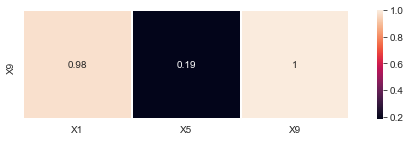

In [55]:
corr = pd.DataFrame(train_processed.corr()['X9'].abs())
fig, ax = plt.subplots(figsize=(10, 2))
sns.heatmap(corr.T, annot=True, square=True, linewidth=1)

In [56]:
X = train_processed.drop('X9', axis=1)

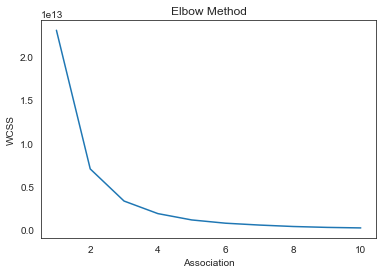

In [57]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
kmeans.predict(X)
train_processed['cluster'] = kmeans.labels_

In [59]:
train_processed.groupby('cluster')['X9'].value_counts()

cluster  X9  
0        7.0     11885
         8.0     10903
         10.0     9567
         6.0      9320
         9.0      9157
                 ...  
2        30.0      265
         31.0      196
         32.0      169
         33.0       83
         34.0       78
Name: X9, Length: 105, dtype: int64

In [60]:
train_processed[train_processed['cluster'] == 1].groupby('cluster')['X9'].value_counts().nlargest(1)

cluster  X9  
1        14.0    2768
Name: X9, dtype: int64

In [61]:
train_processed.loc[(train_processed['cluster'] == 0) & (train_processed['X9'].isnull()), 'X9'] = 7
train_processed.loc[(train_processed['cluster'] == 1) & (train_processed['X9'].isnull()), 'X9'] = 14
train_processed.loc[(train_processed['cluster'] == 2) & (train_processed['X9'].isnull()), 'X9'] = 30

In [62]:
train_processed['X9'].isnull().sum() / len(train_processed)

0.0

In [63]:
train_processed['X9'].unique()

array([ 8.,  9., 17., 11., 12., 18.,  7., 14.,  4., 16.,  5., 13.,  3.,
        2., 10., 23.,  6.,  1., 21., 20., 15., 25., 26.,  0., 27., 24.,
       19., 30., 22., 28., 34., 29., 33., 32., 31.])

In [64]:
train_processed['X9'] = train_processed['X9'].astype('int')

In [65]:
train_processed.drop('cluster', axis=1, inplace=True)

In [66]:
train_processed.head()

,X1,X5,X7,X9,X14,X17,Past_due_over_30_days,Inquiries
0,11.89,25000.0,1,8,1,0,0,0
1,10.71,7000.0,1,9,0,0,0,0
2,16.99,25000.0,1,17,1,0,0,0
3,13.11,1200.0,1,11,0,0,0,0
4,13.57,10800.0,1,12,0,0,0,1


<AxesSubplot:>

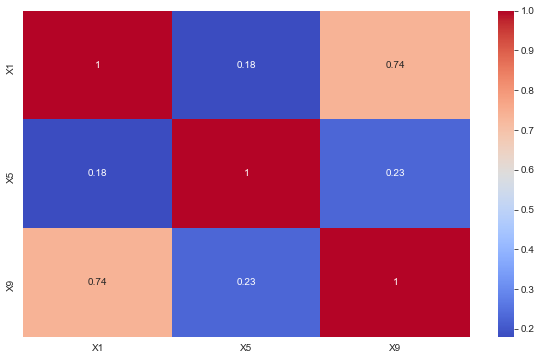

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(round(train_processed.corr(), 2), cmap='coolwarm', annot=True)

---

### Modeling

In [68]:
X, y = train_processed.drop(['X1'], axis=1), train_processed['X1']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [70]:
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [71]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=SEED)
rf = RandomForestRegressor(random_state=SEED)
gb = GradientBoostingRegressor(random_state=SEED)

classifiers = [('Linear Regression', lr),
               ('K-Nearest Neighbors', knn),
               ('Decision Tree', dt),
               ('Random Forest', rf),
               ('Gradient Boosting', gb)]

In [72]:
for clf_name, clf in classifiers:    
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    cv_mse = - cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = cv_mse**(1/2)
    print('{:s} : {:.3f}'.format(clf_name, np.mean(cv_rmse)))

Linear Regression : 2.775
K-Nearest Neighbors : 1.926
Decision Tree : 1.833
Random Forest : 1.743
Gradient Boosting : 1.766


In [73]:
rf = RandomForestRegressor(random_state=SEED)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

rmse_test = MSE(y_test, y_pred_rf)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 1.73
Train set RMSE of rf: 1.45


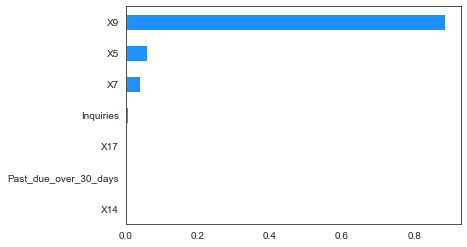

In [74]:
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='dodgerblue')
plt.show()

In [75]:
gb = GradientBoostingRegressor(random_state=SEED)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

rmse_test = MSE(y_test, y_pred_gb)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print('Test set RMSE of gb: {:.2f}'.format(rmse_test))
print('Train set RMSE of gb: {:.2f}'.format(rmse_train))

Test set RMSE of gb: 1.75
Train set RMSE of gb: 1.76


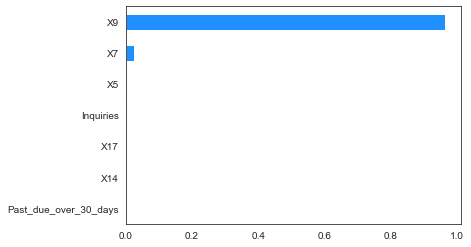

In [76]:
importances_gb = pd.Series(gb.feature_importances_, index = X.columns)
sorted_importances_gb = importances_gb.sort_values()
sorted_importances_gb.plot(kind='barh', color='dodgerblue')
plt.show()

### Hyperparameter Tuning

__Random Forest__

In [77]:
%%time

param_grid = {"max_depth": [4],
              "min_samples_split": [300],
              "min_samples_leaf": [30], 
              "n_estimators": [40, 60, 80]}

rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_cv.fit(X_train, y_train)
y_pred_rf = rf_cv.predict(X_test)

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_rf)**(1/2)))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Tuned Random Forest Parameters: {'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 300, 'n_estimators': 80}
Best score is 1.946
Wall time: 1min 8s


In [78]:
%%time

param_grid = {"max_depth": range(2, 8),
              "min_samples_split": [300],
              "min_samples_leaf": [30], 
              "n_estimators": [40]}

rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_cv.fit(X_train, y_train)
y_pred_rf = rf_cv.predict(X_test)

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_rf)**(1/2)))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Tuned Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 300, 'n_estimators': 40}
Best score is 1.727
Wall time: 1min 15s


In [79]:
%%time

param_grid = {"max_depth": [7],
              "min_samples_split": [300],
              "min_samples_leaf": range(10, 51, 10), 
              "n_estimators": [40]}

rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_cv.fit(X_train, y_train)
y_pred_rf = rf_cv.predict(X_test)

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_rf)**(1/2)))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Tuned Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 300, 'n_estimators': 40}
Best score is 1.725
Wall time: 1min 44s


In [80]:
%%time

param_grid = {"max_depth": [7],
              "min_samples_split": [100, 200, 300, 400, 500],
              "min_samples_leaf": [10], 
              "n_estimators": [40]}

rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_cv.fit(X_train, y_train)
y_pred_rf = rf_cv.predict(X_test)

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_rf)**(1/2)))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Tuned Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 500, 'n_estimators': 40}
Best score is 1.724
Wall time: 1min 29s


In [81]:
%%time

param_grid = {"max_depth": [7],
              "min_samples_split": [100],
              "min_samples_leaf": [10], 
              "n_estimators": [40, 200, 400]}

rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
rf_cv.fit(X_train, y_train)
y_pred_rf = rf_cv.predict(X_test)

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_rf)**(1/2)))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Tuned Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 200}
Best score is 1.723
Wall time: 6min 24s


In [82]:
rf = rf_cv.best_estimator_
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

rmse_test = MSE(y_test, y_pred_rf)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 1.72
Train set RMSE of rf: 1.73


__Gradient Boosting__

In [83]:
%%time

param_grid = {'n_estimators' : range(20, 81, 10),
              'learning_rate': [0.1],
              'min_samples_split': [300],
              'min_samples_leaf': [30],
              'max_depth': [5],
              'max_features': ['sqrt'],
              'subsample': [0.8]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 300, 'n_estimators': 80, 'subsample': 0.8}
Best score is 1.735
Wall time: 1min 22s


In [84]:
%%time

param_grid = {'n_estimators' : [80],
              'learning_rate': [0.01, 0.05, 0.1, 0.15],
              'min_samples_split': [300],
              'min_samples_leaf': [30],
              'max_depth': [5],
              'max_features': ['sqrt'],
              'subsample': [0.8]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 300, 'n_estimators': 80, 'subsample': 0.8}
Best score is 1.696
Wall time: 1min 36s


In [85]:
%%time

param_grid = {'n_estimators' : [80],
              'learning_rate': [0.15],
              'min_samples_split': range(100, 501, 100),
              'min_samples_leaf': [30],
              'max_depth': [5],
              'max_features': ['sqrt'],
              'subsample': [0.8]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 400, 'n_estimators': 80, 'subsample': 0.8}
Best score is 1.706
Wall time: 1min 52s


In [86]:
%%time

param_grid = {'n_estimators' : [80],
              'learning_rate': [0.15],
              'min_samples_split': [400],
              'min_samples_leaf': range(10, 51, 10),
              'max_depth': [5],
              'max_features': ['sqrt'],
              'subsample': [0.8]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 400, 'n_estimators': 80, 'subsample': 0.8}
Best score is 1.706
Wall time: 1min 54s


In [87]:
%%time

param_grid = {'n_estimators' : [80],
              'learning_rate': [0.15],
              'min_samples_split': [400],
              'min_samples_leaf': [30],
              'max_depth': [5],
              'max_features': range(1, 8),
              'subsample': [0.8]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 30, 'min_samples_split': 400, 'n_estimators': 80, 'subsample': 0.8}
Best score is 1.652
Wall time: 3min 40s


In [88]:
%%time

param_grid = {'n_estimators' : [80],
              'learning_rate': [0.15],
              'min_samples_split': [400],
              'min_samples_leaf': [30],
              'max_depth': [5],
              'max_features': [7],
              'subsample': [0.6, 0.7, 0.8, 0.9]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 30, 'min_samples_split': 400, 'n_estimators': 80, 'subsample': 0.7}
Best score is 1.653
Wall time: 2min 33s


In [89]:
%%time

param_grid = {'n_estimators' : [400],
              'learning_rate': [0.03],
              'min_samples_split': [400],
              'min_samples_leaf': [30],
              'max_depth': [5],
              'max_features': [7],
              'subsample': [0.7]}
gb = GradientBoostingRegressor(random_state=SEED)
gb_cv = GridSearchCV(gb, param_grid, cv=10, n_jobs=-1, verbose=1)
gb_cv.fit(X_train, y_train)
y_pred_gb = gb_cv.predict(X_test)

print("Tuned Gradient Boosting Parameters: {}".format(gb_cv.best_params_))
print("Best score is {:.3f}".format(MSE(y_test, y_pred_gb)**(1/2)))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Tuned Gradient Boosting Parameters: {'learning_rate': 0.03, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 30, 'min_samples_split': 400, 'n_estimators': 400, 'subsample': 0.7}
Best score is 1.654
Wall time: 5min 51s


In [90]:
y_pred_train = gb_cv.predict(X_train)

rmse_test = MSE(y_test, y_pred_gb)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print('Test set RMSE of gb: {:.2f}'.format(rmse_test))
print('Train set RMSE of gb: {:.2f}'.format(rmse_train))

Test set RMSE of gb: 1.65
Train set RMSE of gb: 1.66


Based on the results, I chose __Gradient Boosting__ as the final model.

In [91]:
# save the model
import pickle
filename = 'finalized_model.sav'
pickle.dump(gb, open(filename, 'wb'))

---

### Applying the Model to Holdout Data

In [92]:
test = pd.read_csv("Holdout for Testing.csv")
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [94]:
test['X7'] = test['X7'].str.strip()
test['X7'].unique()

array(['36 months', '60 months'], dtype=object)

In [95]:
test['X9'].value_counts().sort_index()

A1    1511
A2    2190
A3    2053
A4    3348
A5    4685
B1    3666
B2    3924
B3    4346
B4    4816
B5    4557
C1    4988
C2    5003
C3    4634
C4    4590
C5    3654
D1    3406
D2    2685
D3    2441
D4    2379
D5    2079
E1    1842
E2    1584
E3    1359
E4    1066
E5     853
F1     614
F2     422
F3     325
F4     268
F5     216
G1     177
G2     130
G3      91
G4      54
G5      44
Name: X9, dtype: int64

In [96]:
test['X14'].unique()

array(['VERIFIED - income', 'VERIFIED - income source', 'not verified'],
      dtype=object)

In [97]:
test['X17'].value_counts()

debt_consolidation    49884
credit_card           18660
home_improvement       3920
other                  3383
major_purchase         1232
small_business          668
medical                 619
car                     573
moving                  393
vacation                359
house                   266
renewable_energy         42
wedding                   1
Name: X17, dtype: int64

In [98]:
test['X5'] = test['X5'].str.replace(r'\D', '').astype(float)

test['X7'] = test['X7'].apply(lambda x: 1 if x == '36 months' else 0)

loan_grade_label = {'A1':0, 'A2':1, 'A3':2, 'A4':3, 'A5':4,
                    'B1':5, 'B2':6, 'B3':7, 'B4':8, 'B5':9, 
                    'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14, 
                    'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19, 
                    'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24, 
                    'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29, 
                    'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}
test['X9'] = np.where(test['X9'].isnull(), np.nan, test['X9'].replace(loan_grade_label))

test['X14'] = test['X14'].apply(lambda x: 0 if x == 'not verified' else 1)

loan_cat_label = {'debt_consolidation':0, 'credit_card':0, 'car':0, 'home_improvement':0, 'small_business':1, 'major_purchase':0, 
                  'other':1, 'house':1, 'vacation':1, 'educational':0, 'moving':1, 'wedding':0, 'medical':1, 'renewable_energy':1}
test['X17'] = test['X17'].replace(loan_cat_label)

test['Past_due_over_30_days'] = test['X22'].apply(lambda x: 1 if x != 0 else 0)

test['Inquiries'] = test['X24'].apply(lambda x: 1 if x != 0 else 0)

In [99]:
test = test.drop(['X2', 'X3', 'X4', 'X6', 'X8', 'X10', 'X11', 'X12', 'X13', 'X15', 'X16', 'X18', 'X19', 
                  'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32'], axis=1)
test.head(1)

,X1,X5,X7,X9,X14,X17,Past_due_over_30_days,Inquiries
0,NaN,6000.0,1,14.0,1,0,0,1


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X1                     0 non-null      float64
 1   X5                     80000 non-null  float64
 2   X7                     80000 non-null  int64  
 3   X9                     80000 non-null  float64
 4   X14                    80000 non-null  int64  
 5   X17                    80000 non-null  int64  
 6   Past_due_over_30_days  80000 non-null  int64  
 7   Inquiries              80000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.9 MB


In [101]:
X_holdout = test.drop(['X1'], axis=1)

In [102]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.fit(X_train, y_train)
y_pred = loaded_model.predict(X_holdout)

In [103]:
test['X1'] = y_pred
test.head(1)

,X1,X5,X7,X9,X14,X17,Past_due_over_30_days,Inquiries
0,15.802074,6000.0,1,14.0,1,0,0,1


<AxesSubplot:xlabel='X1', ylabel='Density'>

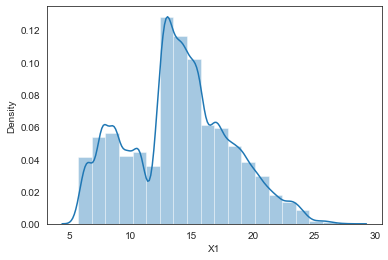

In [104]:
sns.distplot(test['X1'], bins=20)

In [105]:
test['X1'].describe()

count    80000.000000
mean        13.961220
std          4.196840
min          5.705118
25%         10.785790
50%         13.919373
75%         16.714912
max         27.927506
Name: X1, dtype: float64

In [106]:
test.to_csv('Results from Jitak Ahn.csv', index=False)

__Summary__
<br>
For loan prediction model, I initially started with Linear Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Gradient Boosting. After running initial analysis, I decided to tune the parameters for Random Forest and Gradient Boosting models. Based on the RMSE from tuned models, I chose Gradient Boosting to test the holdout dataset. By using gradient boosting, I can avoid overfitting and make a model that can work well generally.